In [56]:
import numpy as np
import h5py 
fp = h5py.File('/Users/chireg/GSOC- ML4SCi/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5',"r")

In [57]:
fp.keys()

<KeysViewHDF5 ['X', 'y']>

In [58]:
X = fp['X'][:,:,:,:]
y = fp['y'][:]
X.shape, y.shape

((249000, 32, 32, 2), (249000,))

In [59]:
example_channel1 = fp['X'][0,:,:,0]
example_channel2 = fp['X'][0,:,:,1]

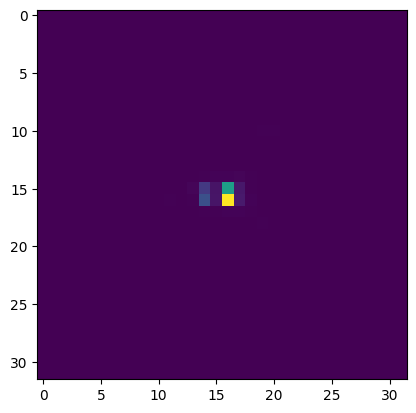

In [60]:
import matplotlib.pyplot as plt 

plt.imshow(example_channel1)

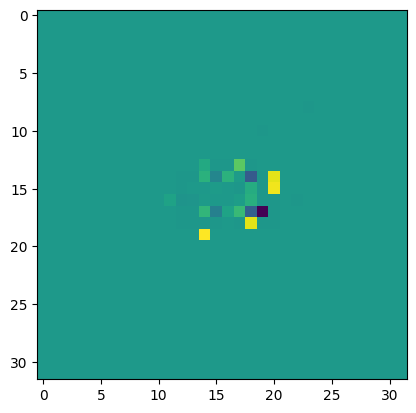

In [61]:
plt.imshow(example_channel2)

In [62]:
import torch
import torchvision
import os 
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)


X_train

array([[[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
   

In [70]:
from pytorch_lightning.trainer.supporters import CombinedLoader

def train_dataloader():
    loader_X = DataLoader(X_train)
    loader_y = DataLoader(y_train)
    loaders = {"a": loader_X, "b": loader_y}
    combined_loader = CombinedLoader(loaders, mode="max_size_cycle")
    return combined_loader

def test_dataloader():
    loader_X = DataLoader(X_test)
    loader_y = DataLoader(y_test)
    loaders = {"a": loader_X, "b": loader_y}
    combined_loader = CombinedLoader(loaders, mode="max_size_cycle")
    return combined_loader

loaders = {
    'train' : train_dataloader(),
    'test'  : test_dataloader()
}
loaders
    

{'train': <pytorch_lightning.trainer.supporters.CombinedLoader at 0x144e6cd00>,
 'test': <pytorch_lightning.trainer.supporters.CombinedLoader at 0x1680c8c70>}

In [71]:
class CNN(nn.Module):
    class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            self.conv1 = nn.Sequential(         
                nn.Conv2d(
                    in_channels=2,              
                    out_channels=16,            
                    kernel_size=5,              
                    stride=1,                   
                    padding=2,                  
                ),                              
                nn.ReLU(),                      
                nn.MaxPool2d(kernel_size=2),    
            )
            self.conv2 = nn.Sequential(         
                nn.Conv2d(16, 32, 5, 1, 2),     
                nn.ReLU(),                      
                nn.MaxPool2d(2),                
            )
            # fully connected layer, output 10 classes
            self.out = nn.Linear(32 * 7 * 7, 10)
        def forward(self, x):
            x = self.conv1(x)
            x = self.conv2(x)
            # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
            x = x.view(x.size(0), -1)       
            output = self.out(x)
            return output, x    # return x for visualization



In [72]:
cnn = CNN()
print(cnn)

CNN()


In [73]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [74]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [75]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (X, y ) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(X)   # batch x
            b_y = Variable(y)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

TypeError: Variable data has to be a tensor, but got str